<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ML/blob/main/PyTorch_MLP_EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP: EMNIST

##Setup

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST, EMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from tqdm import tqdm

## EMNIST
https://arxiv.org/pdf/1702.05373.pdf

In [ ]:
# Trainingsdatensatz
DS_train = EMNIST("/files/", 
                    download=True, 
                    train=True,
                    split="balanced",
                    transform=Compose([
                        ToTensor(), 
                        Normalize((0.1307,), (0.3081,))
                        ])
                    )
# Dataloader zum Laden von Trainingsdaten in den Arbeitsspeicher
dataloader_train = DataLoader(DS_train, shuffle=True, batch_size=128, num_workers=2)

# Testdatensatz
DS_test = EMNIST("/files/", 
                    download=True, 
                    train=False,
                    split="balanced",
                    transform=Compose([
                        ToTensor(), 
                        Normalize((0.1307,), (0.3081,))
                        ])
                    )
# Dataloader zum Laden von Testsdaten in den Arbeitsspeicher
dataloader_test = DataLoader(DS_test, shuffle=True, batch_size=128, num_workers=2)

# Plotte die ersten 16 Bilder
plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(DS_train[i][0].squeeze().T)
plt.show()

## AKtivierungsfunktionen
https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

* nn.Sigmoid: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html
* nn.Tanh: https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html
* nn.ReLU: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
* nn.LeakyReLU: https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html
* nn.ReLU6: https://pytorch.org/docs/stable/generated/torch.nn.ReLU6.html
* nn.GELU: https://pytorch.org/docs/stable/generated/torch.nn.GELU.html

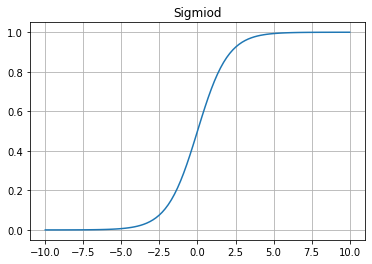

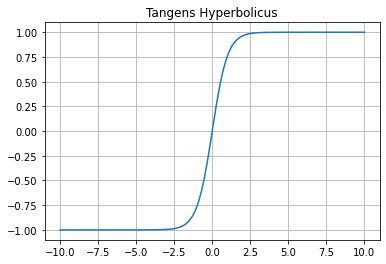

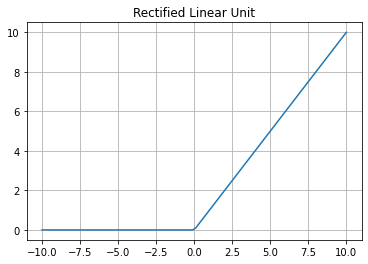

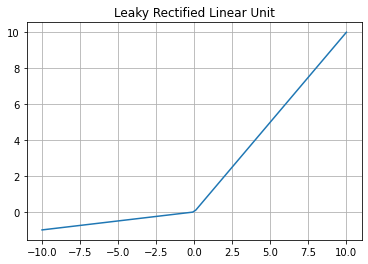

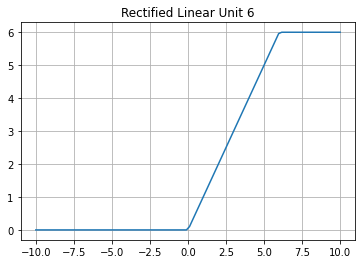

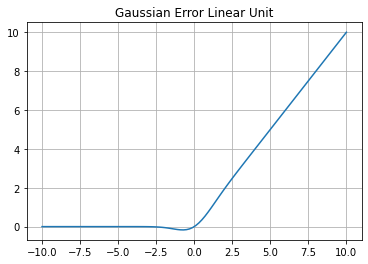

In [ ]:
base = torch.linspace(-10,10, steps=100) # x-Werte

# Sigmoid
act = nn.Sigmoid()
plt.figure()
plt.plot(base, act(base))
plt.title("Sigmiod")
plt.grid()
plt.show()

# TanH
act = nn.Tanh()
plt.figure()
plt.plot(base, act(base))
plt.title("Tangens Hyperbolicus")
plt.grid()
plt.show()

# ReLU
act = nn.ReLU()
plt.figure()
plt.plot(base, act(base))
plt.title("Rectified Linear Unit")
plt.grid()
plt.show()

# Leaky ReLU
act = nn.LeakyReLU(0.1)
plt.figure()
plt.plot(base, act(base))
plt.title("Leaky Rectified Linear Unit")
plt.grid()
plt.show()

# ReLU6
act = nn.ReLU6()
plt.figure()
plt.plot(base, act(base))
plt.title("Rectified Linear Unit 6")
plt.grid()
plt.show()

# GELU
act = nn.GELU()
plt.figure()
plt.plot(base, act(base))
plt.title("Gaussian Error Linear Unit")
plt.grid()
plt.show()

## Layer
* nn.Linear: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
* nn.Dropout: https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
* nn.BatchNorm1D: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
* nn.AvgPool1d: https://pytorch.org/docs/stable/generated/torch.nn.AvgPool1d.html
* nn.MaxPool1d: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html



In [ ]:
# Layer:
in_features = 10
out_features = 20
linear = nn.Linear(in_features=in_features, out_features=out_features, bias=True)

# Dropout
dropout = nn.Dropout(0.5)

# Normalisierung
bn = nn.BatchNorm1d(num_features=out_features)

# Pooling
maxpool = nn.MaxPool1d(kernel_size=2, stride=2)
avgpool = nn.AvgPool1d(kernel_size=2, stride=2)

## Model - Multilayer Perceptron (MLP)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        pass
    
    def forward(self, x):
        out = x.flatten(start_dim=1, end_dim=-1) # nicht ändern, Bilder werden vektorisiert!
        
        return out


## Training

-------------------- Epoch 0 --------------------
Start Training


100%|██████████| 882/882 [00:29<00:00, 29.90it/s]


Loss: 1.09664785861969
Acc: 0.6851773262023926
Start Testing


100%|██████████| 147/147 [00:04<00:00, 30.89it/s]


Loss: 0.7993037104606628
Acc: 0.760212779045105


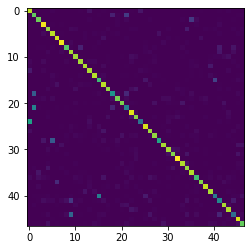

-------------------- Epoch 1 --------------------
Start Training


100%|██████████| 882/882 [00:32<00:00, 27.22it/s]


Loss: 0.6833627223968506
Acc: 0.7872340679168701
Start Testing


100%|██████████| 147/147 [00:04<00:00, 31.48it/s]


Loss: 0.6628537178039551
Acc: 0.7963297963142395


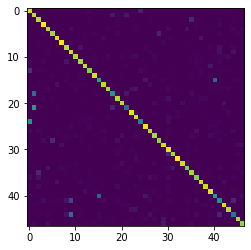

-------------------- Epoch 2 --------------------
Start Training


100%|██████████| 882/882 [00:29<00:00, 29.48it/s]


Loss: 0.5795782208442688
Acc: 0.8155762553215027
Start Testing


100%|██████████| 147/147 [00:06<00:00, 24.10it/s]


Loss: 0.6066064834594727
Acc: 0.8086702227592468


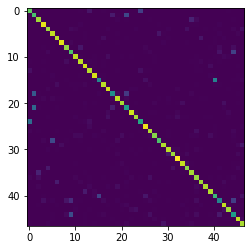

-------------------- Epoch 3 --------------------
Start Training


100%|██████████| 882/882 [00:30<00:00, 29.26it/s]


Loss: 0.5250137448310852
Acc: 0.8285017609596252
Start Testing


100%|██████████| 147/147 [00:05<00:00, 29.29it/s]


Loss: 0.6027050614356995
Acc: 0.8107447028160095


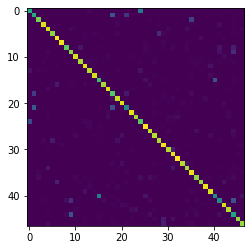

-------------------- Epoch 4 --------------------
Start Training


100%|██████████| 882/882 [00:31<00:00, 28.29it/s]


Loss: 0.49369359016418457
Acc: 0.8367996215820312
Start Testing


100%|██████████| 147/147 [00:04<00:00, 30.67it/s]


Loss: 0.5733447074890137
Acc: 0.8177127838134766


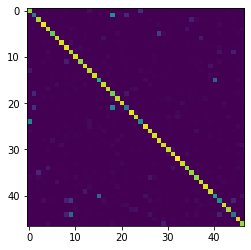

-------------------- Epoch 5 --------------------
Start Training


100%|██████████| 882/882 [00:30<00:00, 29.09it/s]


Loss: 0.46592286229133606
Acc: 0.8453634977340698
Start Testing


100%|██████████| 147/147 [00:05<00:00, 26.31it/s]


Loss: 0.5762571096420288
Acc: 0.8211702108383179


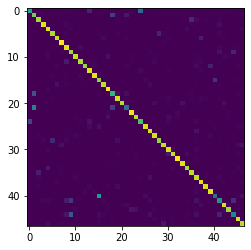

-------------------- Epoch 6 --------------------
Start Training


100%|██████████| 882/882 [00:29<00:00, 29.40it/s]


Loss: 0.4498499035835266
Acc: 0.8466843962669373
Start Testing


100%|██████████| 147/147 [00:05<00:00, 25.61it/s]


Loss: 0.5789011716842651
Acc: 0.822712779045105


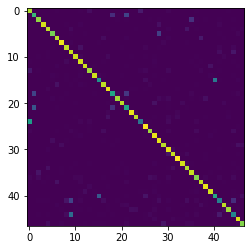

-------------------- Epoch 7 --------------------
Start Training


100%|██████████| 882/882 [00:31<00:00, 27.91it/s]


Loss: 0.43425989151000977
Acc: 0.8512411117553711
Start Testing


100%|██████████| 147/147 [00:04<00:00, 30.24it/s]


Loss: 0.5666365623474121
Acc: 0.8219680786132812


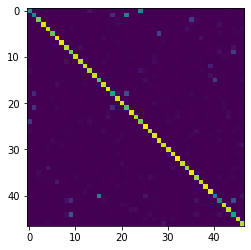

-------------------- Epoch 8 --------------------
Start Training


100%|██████████| 882/882 [00:30<00:00, 28.82it/s]


Loss: 0.4192974269390106
Acc: 0.8555230498313904
Start Testing


100%|██████████| 147/147 [00:05<00:00, 26.99it/s]


Loss: 0.5689931511878967
Acc: 0.824042558670044


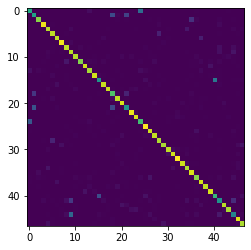

-------------------- Epoch 9 --------------------
Start Training


100%|██████████| 882/882 [00:30<00:00, 29.26it/s]


Loss: 0.4078752398490906
Acc: 0.8588652610778809
Start Testing


100%|██████████| 147/147 [00:06<00:00, 24.42it/s]


Loss: 0.5644910931587219
Acc: 0.8205851316452026


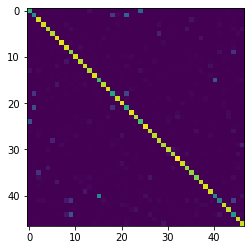

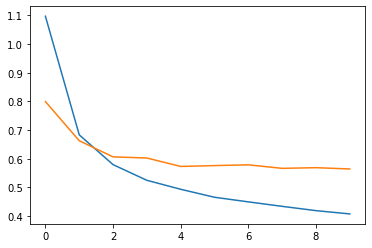

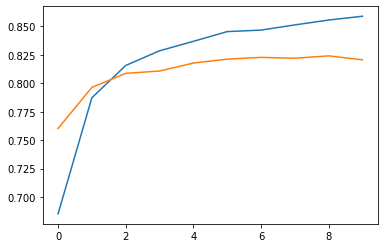

In [ ]:
# Hyperparameter
n_epochs = 10
lr = 1e-3

# Initialisiere Model
model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

lossliste_train = torch.zeros(n_epochs)
accliste_train = torch.zeros(n_epochs)
lossliste_test = torch.zeros(n_epochs)
accliste_test = torch.zeros(n_epochs)
for epoch in range(n_epochs):
    print(20*"-"+" Epoch " + str(epoch) + " " + 20*"-")
    print("Start Training")

    model.train() # Versetze Model in Trainingsmodus
    losses = 0 
    accs = 0
    for data, label in tqdm(dataloader_train):
        optimizer.zero_grad()

        output = model(data)
        loss = criterion(output, label)
        loss.backward()     # Berechne Gradienten
        optimizer.step()    # Update-Schritt

        losses += len(data)*loss.item()                         # Berechen Loss
        accs += torch.sum(torch.argmax(output, dim=-1)==label)  # Berechne Accuracy
    lossliste_train[epoch] = losses/len(DS_train)   # Speichere Loss
    accliste_train[epoch] = accs/len(DS_train)      # Speichere Accuracy
    print("Loss:", lossliste_train[epoch].item())
    print("Acc:", accliste_train[epoch].item())
    
    print("Start Testing")
    model.eval()    # Versetze Model in Evaluationsmodus
    losses = 0
    accs = 0
    confusionmat = torch.zeros([47,47])
    for data, label in tqdm(dataloader_test):
        output = model(data)
        output_argmax = torch.argmax(output, dim=-1)
        loss = criterion(output, label)
        losses += len(data)*loss.item()
        accs += torch.sum(output_argmax==label)
        for l, oarg in zip(label, output_argmax):   # Berechne Confusion-Matrix
            confusionmat[l, oarg] += 1
    lossliste_test[epoch] = losses/len(DS_test) # Speichere Loss
    accliste_test[epoch] = accs/len(DS_test)    # Speichere Accuracy
    print("Loss:", lossliste_test[epoch].item())
    print("Acc:", accliste_test[epoch].item())
    plt.figure()
    plt.imshow(confusionmat)
    plt.show()

# Plotte Losses
plt.figure()
plt.plot(lossliste_train.detach().numpy())
plt.plot(lossliste_test.detach().numpy())
plt.show()

# Plotte Accuracies
plt.figure()
plt.plot(accliste_train.detach().numpy())
plt.plot(accliste_test.detach().numpy())
plt.show()